In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('data.csv')

In [5]:
df.head(2)

,img_url,title,year,certificate,duration,genre,imdb,metascore,overview,director,actors
0,https://m.media-amazon.com/images/M/MV5BOWI4NG...,Hababam Sinifi,1975,3,87,"Comedy, Drama",9.3,NaN,"Lazy, uneducated students share a very close b...",Ertem Egilmez,Kemal Sunal\tMünir Özkul\tHalit Akçatepe\tTari...
1,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,0,142,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins\tMorgan Freeman\tBob Gunton\tWilli...


Result dict key: [total, count]

 {'Comedy': [23147.699999999804, 3595], 'Drama': [37836.49999999979, 5486], 'Crime': [13394.500000000015, 2007], 'Mystery': [6488.100000000014, 1004], 'Thriller': [10638.200000000013, 1657], 'Action': [15373.90000000004, 2403], 'Adventure': [10781.699999999983, 1663], 'Biography': [4574.199999999989, 644], 'History': [2389.4999999999986, 337], 'Family': [2930.3999999999996, 464], 'Music': [1834.8999999999994, 270], 'Sci-Fi': [4433.0999999999985, 707], 'Horror': [7209.19999999999, 1203], 'Romance': [11127.100000000024, 1678], 'Western': [806.4999999999998, 113], 'Fantasy': [4562.700000000002, 725], 'Sport': [1300.6999999999987, 195], 'Animation': [3107.200000000001, 453], 'War': [1582.799999999999, 220], 'Film-Noir': [424.10000000000025, 55], 'Musical': [880.8999999999997, 128]}


 Result dict key: mean

 {'Comedy': 6.438859527120947, 'Drama': 6.896919431279582, 'Crime': 6.673891380169414, 'Mystery': 6.46225099601595, 'Thriller': 6.420156910078463, 'Acti

[Text(0, 0, 'Comedy'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Crime'),
 Text(3, 0, 'Mystery'),
 Text(4, 0, 'Thriller'),
 Text(5, 0, 'Action'),
 Text(6, 0, 'Adventure'),
 Text(7, 0, 'Biography'),
 Text(8, 0, 'History'),
 Text(9, 0, 'Family'),
 Text(10, 0, 'Music'),
 Text(11, 0, 'Sci-Fi'),
 Text(12, 0, 'Horror'),
 Text(13, 0, 'Romance'),
 Text(14, 0, 'Western'),
 Text(15, 0, 'Fantasy'),
 Text(16, 0, 'Sport'),
 Text(17, 0, 'Animation'),
 Text(18, 0, 'War'),
 Text(19, 0, 'Film-Noir'),
 Text(20, 0, 'Musical')]

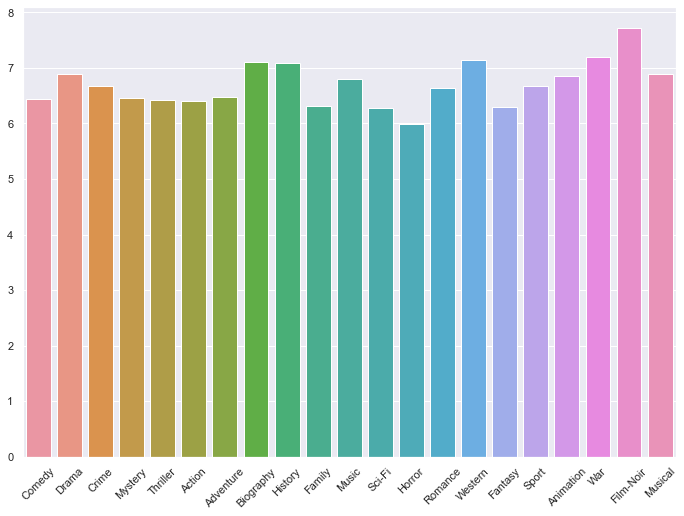

In [28]:
# Let's examine which genres have high imdb score (mean)
result_dict = {}
def genre_func(x):  
    genre_list = x['genre'].replace(' ', '').split(',')
    
    for genre in genre_list:
        if genre not in result_dict:
            result_dict[genre] = [x['imdb'], 1]
        else:
            result_ls = result_dict[genre]
            result_dict[genre] = [x['imdb'] + result_ls[0], result_ls[1] + 1]
    return 1
    
df.apply(genre_func, axis=1)
# this is result dict
print("Result dict key: [total, count]\n\n", result_dict)
for key, value in result_dict.items():
    result_dict[key] = value[0] / value[1]
print("\n\n Result dict key: mean\n\n",result_dict)

keys = list(result_dict.keys())

vals = [result_dict[k] for k in keys]
sns.set(rc={'figure.figsize':(11.7,8.27)})

my_plot = sns.barplot(x=keys, y=vals)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

In [43]:
# stars that have more than 9 imdb score
actor_dict = {}
def actor_imdb(x):
    if x['imdb'] >= 9:
        for i in str(x['actors']).split('\t'):
            if i not in actor_dict:
                actor_dict[i] = 1
            else:
                actor_dict[i] += 1 
        return str(x['actors']).split('\t')
    else:
        return None
df.apply(actor_imdb, axis=1)
actor_dict

{'Kemal Sunal': 1,
 'Münir Özkul': 1,
 'Halit Akçatepe': 1,
 'Tarik Akan': 1,
 'Tim Robbins': 1,
 'Morgan Freeman': 1,
 'Bob Gunton': 1,
 'William Sadler': 1,
 'Marlon Brando': 1,
 'Al Pacino': 2,
 'James Caan': 1,
 'Diane Keaton': 2,
 'Chanchal Chowdhury': 1,
 'Masuma Rahman Nabila': 1,
 'Partha Barua': 1,
 'Lutfur Rahman George': 1,
 'Christian Bale': 1,
 'Heath Ledger': 1,
 'Aaron Eckhart': 1,
 'Michael Caine': 1,
 'Elijah Wood': 1,
 'Viggo Mortensen': 1,
 'Ian McKellen': 1,
 'Orlando Bloom': 1,
 'Liam Neeson': 1,
 'Ralph Fiennes': 1,
 'Ben Kingsley': 1,
 'Caroline Goodall': 1,
 'Robert De Niro': 1,
 'Robert Duvall': 1,
 'Henry Fonda': 1,
 'Lee J. Cobb': 1,
 'Martin Balsam': 1,
 'John Fiedler': 1}

In [49]:
df2 = pd.read_csv('cos_sim_data.csv')

<AxesSubplot:>

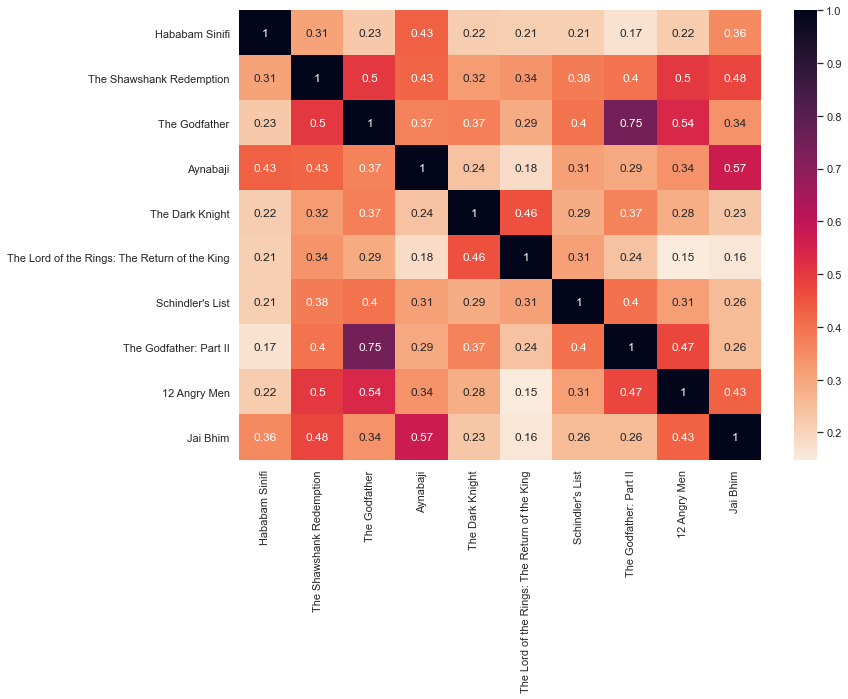

In [59]:
# first 10 movies cosine similarities each other
df2_first_10 = df2.iloc[[i for i in range(10)], [i for i in range(10)]]
sns.heatmap(df2_first_10, cmap='rocket_r', xticklabels=[(df.iloc[i])['title'] for i in range(10)],yticklabels=[(df.iloc[i])['title'] for i in range(10)], annot=True)